In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("dataset.csv")
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Target']=le.fit_transform(df['Target'])

In [ ]:
df.Target

In [37]:
dropout=df[df.Target==0]
dropout.shape

(1421, 35)

In [38]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [40]:
df.drop(df[df['Target']==1].index,inplace=True)

In [41]:
df.groupby('Target').mean()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Target,,,,,,,,,,,,,,,,,,,,,
0,1.261084,8.342013,1.593244,9.898663,0.854328,3.059113,1.250528,13.102745,16.716397,6.916256,...,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
2,1.134903,5.824808,1.851064,9.959258,0.909009,2.226799,1.237211,12.208692,16.629697,7.403803,...,0.088275,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833


<Figure size 500x1000 with 0 Axes>

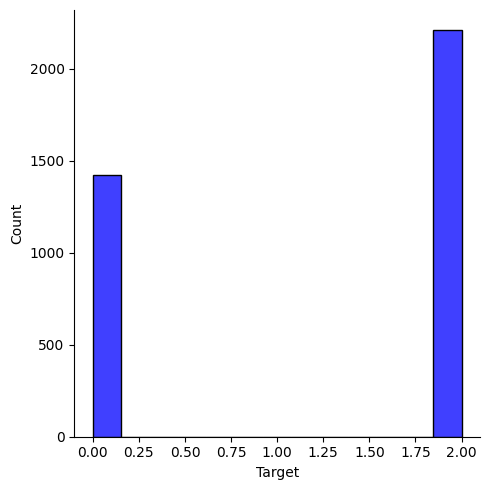

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,10))
sns.displot(df['Target'],color='Blue')

([<matplotlib.patches.Wedge at 0x7834184aac70>,
 [Text(-0.5175392024887888, 0.9706457509757453, 'Male'),
  Text(0.5175392933672003, -0.970645702520224, 'Female')],
 [Text(-0.2822941104484302, 0.529443136895861, '65.59%'),
  Text(0.28229416001847285, -0.5294431104655767, '34.41%')])

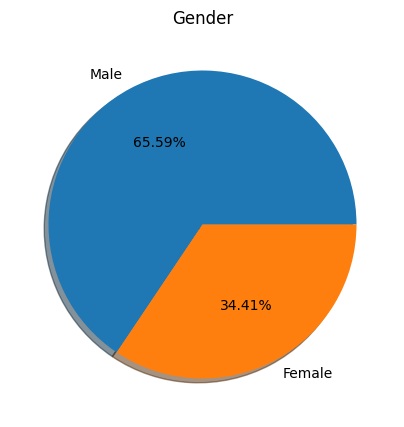

In [45]:
#ratio of Total male and female
plt.figure(figsize=(5,5))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%',shadow=True)

([<matplotlib.patches.Wedge at 0x7834186fd220>,
 [Text(-0.023101508978009465, 1.099757391556401, 'Male'),
  Text(0.023101508978009083, -1.099757391556401, 'Female')],
 [Text(-0.012600823078914252, 0.5998676681216732, '50.67%'),
  Text(0.012600823078914044, -0.5998676681216732, '49.33%')])

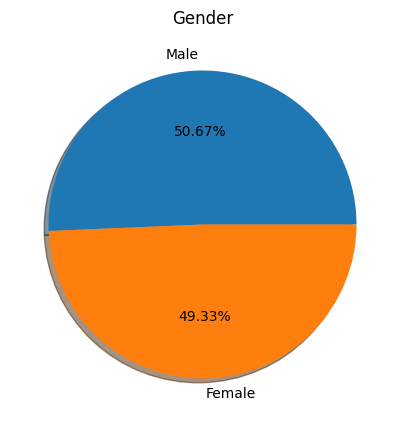

In [48]:
#ratio of dropout boys and girls
df1=df.drop(df[df['Target']==2].index)
plt.figure(figsize=(5,5))
plt.title("Gender")
plt.pie(df1['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%',shadow=True)

In [52]:
#feature selection
corr_matrix=df.corr(method="pearson")
corr_matrix['Target']

Marital status                                   -0.100479
Application mode                                 -0.233888
Application order                                 0.094355
Course                                            0.006814
Daytime/evening attendance                        0.084496
Previous qualification                           -0.102795
Nacionality                                      -0.003823
Mother's qualification                           -0.048459
Father's qualification                           -0.003850
Mother's occupation                               0.064195
Father's occupation                               0.073238
Displaced                                         0.126113
Educational special needs                        -0.007254
Debtor                                           -0.267207
Tuition fees up to date                           0.442138
Gender                                           -0.251955
Scholarship holder                                0.3130

In [61]:
df['Dropout']=df['Target'].apply(lambda x:1 if x==0 else 0)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
5,2,12,1,17,0,12,1,22,27,10,...,5,17,5,11.500000,5,16.2,0.3,-0.92,2,0
6,1,1,1,12,1,1,1,13,28,8,...,8,8,8,14.345000,0,15.5,2.8,-4.06,2,0


/tmp/ipykernel_15441/1176373632.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Dropout'],color='red')


<AxesSubplot: xlabel='Dropout', ylabel='Density'>

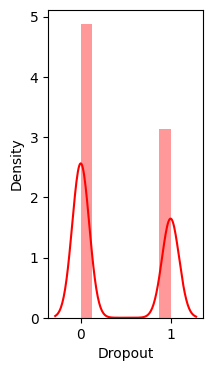

In [63]:
plt.figure(figsize=(2,4))
sns.distplot(df['Dropout'],color='red')

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
x=df.iloc[:,:36].values
X=StandardScaler().fit_transform(x)

In [74]:
y=df['Dropout'].values


In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [115]:

model.score(x_test,y_test)

1.0

In [116]:
y_pred=model.predict(x_test)


Text(95.72222222222221, 0.5, 'Truth')

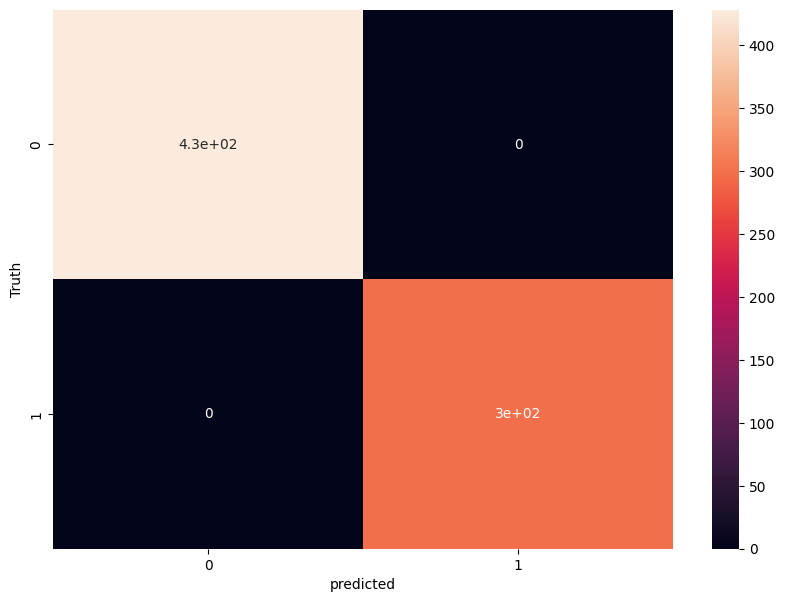

In [117]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),iris.data,iris.target,cv=3)
score_svc=cross_val_score(SVC(gamma='auto'),iris.data,iris.target,cv=3)
score_rf=cross_val_score(RandomForestClassifier(n_estimators=30),iris.data,iris.target,cv=3)
score_dt=cross_val_score(DecisionTreeClassifier(),iris.data,iris.target,cv=3)



In [ ]:
import numpy as np
np.average(score_lr)
np.average(score_svc)
np.average(score_lr)
np.average(score_dt)